In [1]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [2]:
print(cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


## 1.Use breast cancer dataset

### a. How many instances, features, and targets (results) are there?

In [3]:
cancer['data']

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [4]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [5]:
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [6]:
instances = len (cancer.data)
features = len (cancer.feature_names)
targets = len(cancer.target_names)

print("Number of instances: ", instances)
print("Number of features: ", features)
print("Number of targets(result): ", targets)

Number of instances:  569
Number of features:  30
Number of targets(result):  2


### b. Is this dataset an imbalanced dataset? Why?

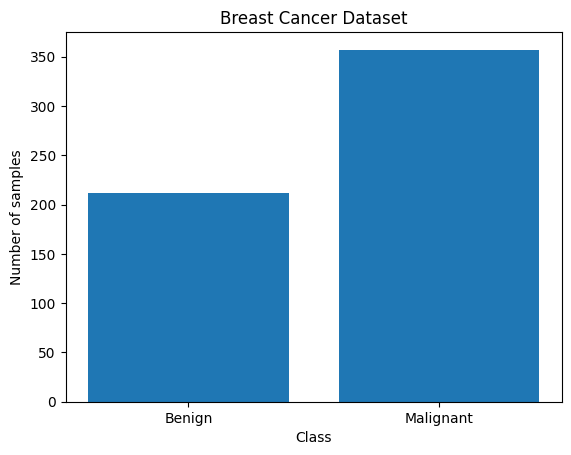

In [7]:
n_benign = len(cancer.target[cancer.target == 0])
n_malignant = len(cancer.target[cancer.target == 1])
labels = ["Benign", "Malignant"]
values = [n_benign, n_malignant]
plt.bar(labels, values)
plt.title("Breast Cancer Dataset")
plt.xlabel("Class")
plt.ylabel("Number of samples")
plt.show()

### c. If this dataset is an imbalanced dataset, please let it be a balanced dataset.

In [8]:
import imblearn.over_sampling as im
from imblearn.over_sampling import SMOTE
from collections import Counter

smo = SMOTE(random_state = 2013)
x = cancer.data
y = cancer.target 
X_smo, y_smo = smo.fit_resample(x, y)
print(Counter(y_smo))

Counter({0: 357, 1: 357})


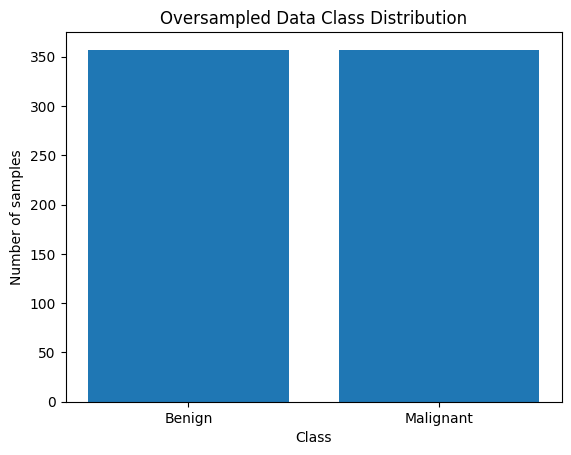

In [9]:
n_benign = len(y_smo[y_smo == 0])
n_malignant = len(y_smo[y_smo == 1])
labels = ["Benign", "Malignant"]
values = [n_benign, n_malignant]
plt.bar(labels, values)
plt.title("Oversampled Data Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of samples")
plt.show()

## 2. Split this dataset to training data and testing data.

### a. Which method will you use? Sequential or random? Why?

I use the package train_test_split form sklearn.model_selection. Because this data isn't time series I use random to split it.

## 3. Decrease the ratio of training data to the whole dataset from 95% to 5% gradually and every change is 5%.

### a. Try to discuss the impact of such changes on the six classification models, Decision Tree, Random Forest, XGBoost, SVC, KNN, and Logistic Regression. The impact is like accuracy, recall, f1-score, or others you image.

In [10]:
def ratio_perform(model, X, y, ratio=100):
  ratiovalues = [i for i in range(5, ratio, 5)]
  train_scores = []
  test_scores = []
  for i in ratiovalues:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i/100, random_state=2023)    
    clf = model
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train) 
    train_acc = accuracy_score(y_pred_train, y_train)
    
    y_pred_test = clf.predict(X_test) 
    test_acc = accuracy_score(y_pred_test, y_test)
    
    train_report = classification_report(y_train, y_pred_train)
    test_report = classification_report(y_test, y_pred_test)
    
    print('>%d, train:\n%s\ntest:\n%s' % (i, train_report, test_report))

    train_scores.append(train_acc)
    test_scores.append(test_acc)

In [11]:
def plot_ratio_perform(model, X, y, ratio=100):
  ratiovalues = [i for i in range(5, ratio, 5)]
  train_scores, test_scores = [], []
  train_recall, test_recall = [], []
  train_precision, test_precision = [], []
  train_f1, test_f1 = [], []
  
  for i in ratiovalues:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i/100, random_state=2023)
    clf = model
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    train_scores.append(accuracy_score(y_train, y_train_pred))
    test_scores.append(accuracy_score(y_test, y_test_pred))
    train_recall.append(recall_score(y_train, y_train_pred))
    test_recall.append(recall_score(y_test, y_test_pred))
    train_precision.append(precision_score(y_train, y_train_pred))
    test_precision.append(precision_score(y_test, y_test_pred))
    train_f1.append(f1_score(y_train, y_train_pred))
    test_f1.append(f1_score(y_test, y_test_pred))

  max_acc, max_acc_ratio = max((val, ratio) for ratio, val in zip(ratiovalues, test_scores))
  max_rec, max_rec_ratio = max((val, ratio) for ratio, val in zip(ratiovalues, test_recall))
  max_prec, max_prec_ratio = max((val, ratio) for ratio, val in zip(ratiovalues, test_precision))
  max_f1, max_f1_ratio = max((val, ratio) for ratio, val in zip(ratiovalues, test_f1))

  print(f"Max accuracy: {max_acc:.3f}, at test_size {max_acc_ratio/100}")
  print(f"Max recall: {max_rec:.3f}, at test_size {max_rec_ratio/100}")
  print(f"Max precision: {max_prec:.3f}, at test_size {max_prec_ratio/100}")
  print(f"Max F1-score: {max_f1:.3f}, at test_size {max_f1_ratio/100}")

  fig, axs = plt.subplots(2, 2, figsize=(10, 8))

  axs[0, 0].plot(ratiovalues, train_scores, '-o', label='Train')
  axs[0, 0].plot(ratiovalues, test_scores, '-o', label='Test')
  axs[0, 0].set_title('Accuracy')
  axs[0, 0].legend()

  axs[0, 1].plot(ratiovalues, train_recall, '-o', label='Train')
  axs[0, 1].plot(ratiovalues, test_recall, '-o', label='Test')
  axs[0, 1].set_title('Recall')
  axs[0, 1].legend()

  axs[1, 0].plot(ratiovalues, train_precision, '-o', label='Train')
  axs[1, 0].plot(ratiovalues, test_precision, '-o', label='Test')
  axs[1, 0].set_title('Precision')
  axs[1, 0].legend()

  axs[1, 1].plot(ratiovalues, train_f1, '-o', label='Train')
  axs[1, 1].plot(ratiovalues, test_f1, '-o', label='Test')
  axs[1, 1].set_title('F1-score')
  axs[1, 1].legend()

  plt.tight_layout()
  plt.show()

#### **Decision Tree**

In [12]:
from sklearn import tree
X = cancer.data
y = cancer.target
model = tree.DecisionTreeClassifier(random_state = 2023)
ratio_perform(model, X, y, ratio=100)

>5, train:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       199
           1       1.00      1.00      1.00       341

    accuracy                           1.00       540
   macro avg       1.00      1.00      1.00       540
weighted avg       1.00      1.00      1.00       540

test:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.94      0.97        16

    accuracy                           0.97        29
   macro avg       0.96      0.97      0.97        29
weighted avg       0.97      0.97      0.97        29

>10, train:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       192
           1       1.00      1.00      1.00       320

    accuracy                           1.00       512
   macro avg       1.00      1.00      1.00       512
weighted avg       1.00      1.00      1.00  

Max accuracy: 0.982, at test_size 0.1
Max recall: 0.984, at test_size 0.85
Max precision: 1.000, at test_size 0.1
Max F1-score: 0.986, at test_size 0.1


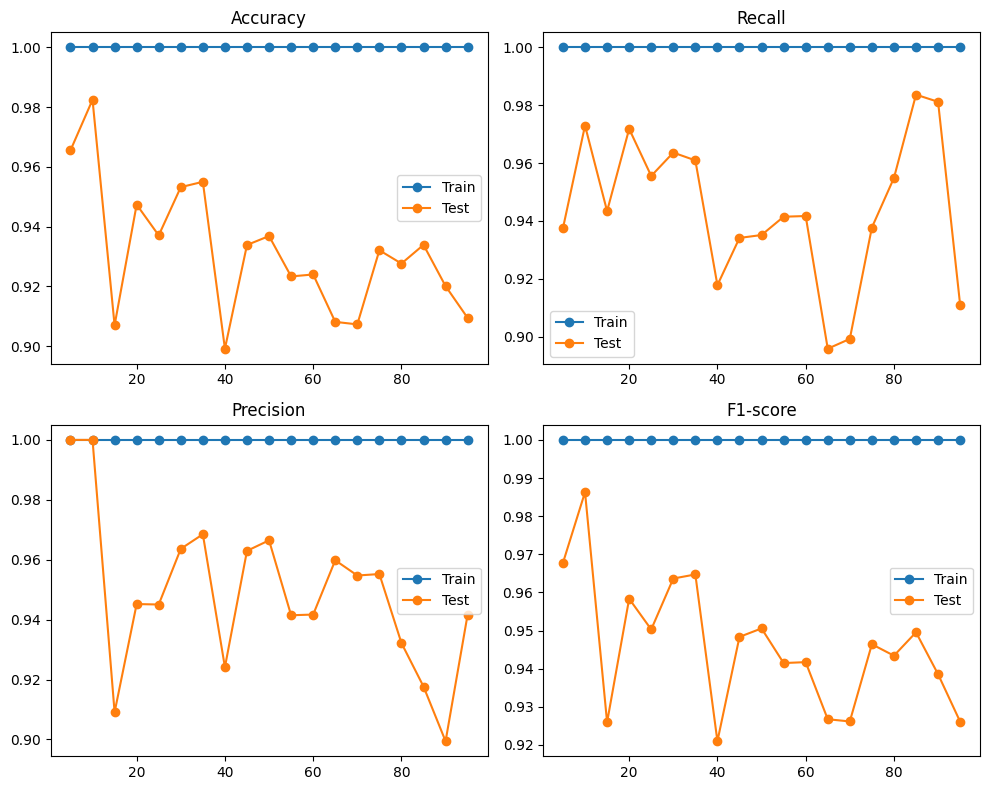

In [13]:
model = tree.DecisionTreeClassifier(random_state=2023)
X = cancer.data
y = cancer.target
plot_ratio_perform(model, X, y, ratio=100)

#### **Random Forest**

In [14]:
from sklearn.ensemble import RandomForestClassifier
X = cancer.data
y = cancer.target
model = RandomForestClassifier(random_state = 2023)
ratio_perform(model, X, y, ratio=100)

>5, train:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       199
           1       1.00      1.00      1.00       341

    accuracy                           1.00       540
   macro avg       1.00      1.00      1.00       540
weighted avg       1.00      1.00      1.00       540

test:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.94      1.00      0.97        16

    accuracy                           0.97        29
   macro avg       0.97      0.96      0.96        29
weighted avg       0.97      0.97      0.97        29

>10, train:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       192
           1       1.00      1.00      1.00       320

    accuracy                           1.00       512
   macro avg       1.00      1.00      1.00       512
weighted avg       1.00      1.00      1.00  

Max accuracy: 0.982, at test_size 0.1
Max recall: 1.000, at test_size 0.9
Max precision: 0.974, at test_size 0.1
Max F1-score: 0.987, at test_size 0.1


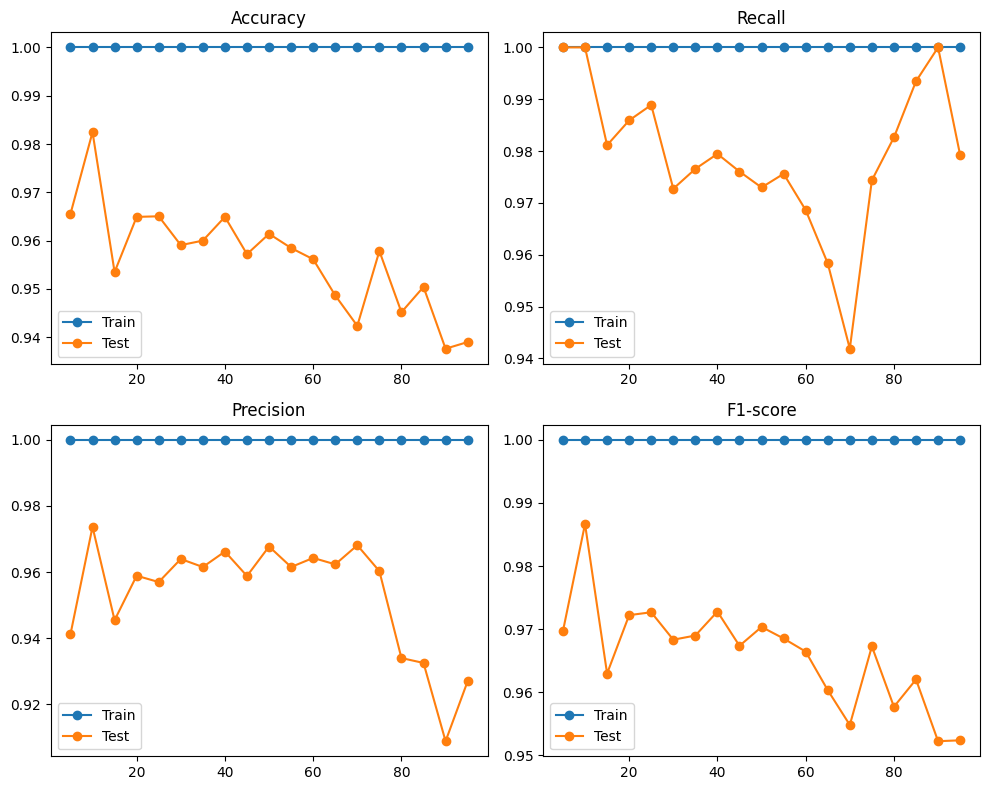

In [15]:
X = cancer.data
y = cancer.target
model = RandomForestClassifier(random_state = 2023)
plot_ratio_perform(model, X, y, ratio=100)

#### **XGBoost**

In [16]:
from xgboost.sklearn import XGBClassifier

X = cancer.data
y = cancer.target
model = XGBClassifier(random_state = 2023)
ratio_perform(model, X, y, ratio=100)

>5, train:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       199
           1       1.00      1.00      1.00       341

    accuracy                           1.00       540
   macro avg       1.00      1.00      1.00       540
weighted avg       1.00      1.00      1.00       540

test:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.94      1.00      0.97        16

    accuracy                           0.97        29
   macro avg       0.97      0.96      0.96        29
weighted avg       0.97      0.97      0.97        29

>10, train:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       192
           1       1.00      1.00      1.00       320

    accuracy                           1.00       512
   macro avg       1.00      1.00      1.00       512
weighted avg       1.00      1.00      1.00  

Max accuracy: 0.982, at test_size 0.2
Max recall: 1.000, at test_size 0.2
Max precision: 0.978, at test_size 0.25
Max F1-score: 0.987, at test_size 0.1


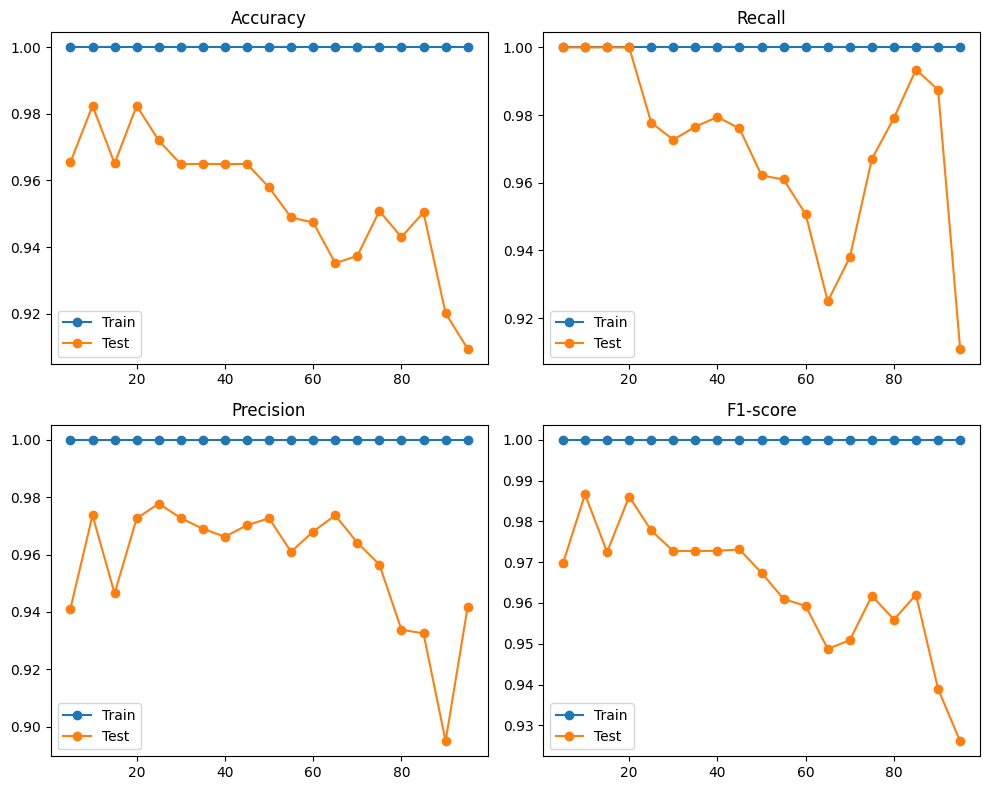

In [17]:
X = cancer.data
y = cancer.target
model = XGBClassifier(random_state = 2023)
plot_ratio_perform(model, X, y, ratio=100)

#### **SVC**

In [18]:
from sklearn import svm

X = cancer.data
y = cancer.target
model = svm.SVC(random_state = 2023)
ratio_perform(model, X, y, ratio=100)

>5, train:
              precision    recall  f1-score   support

           0       0.95      0.82      0.88       199
           1       0.90      0.98      0.94       341

    accuracy                           0.92       540
   macro avg       0.93      0.90      0.91       540
weighted avg       0.92      0.92      0.92       540

test:
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        13
           1       0.89      1.00      0.94        16

    accuracy                           0.93        29
   macro avg       0.94      0.92      0.93        29
weighted avg       0.94      0.93      0.93        29

>10, train:
              precision    recall  f1-score   support

           0       0.95      0.83      0.89       192
           1       0.90      0.97      0.94       320

    accuracy                           0.92       512
   macro avg       0.93      0.90      0.91       512
weighted avg       0.92      0.92      0.92  

Max accuracy: 0.931, at test_size 0.05
Max recall: 1.000, at test_size 0.1
Max precision: 0.914, at test_size 0.5
Max F1-score: 0.949, at test_size 0.1


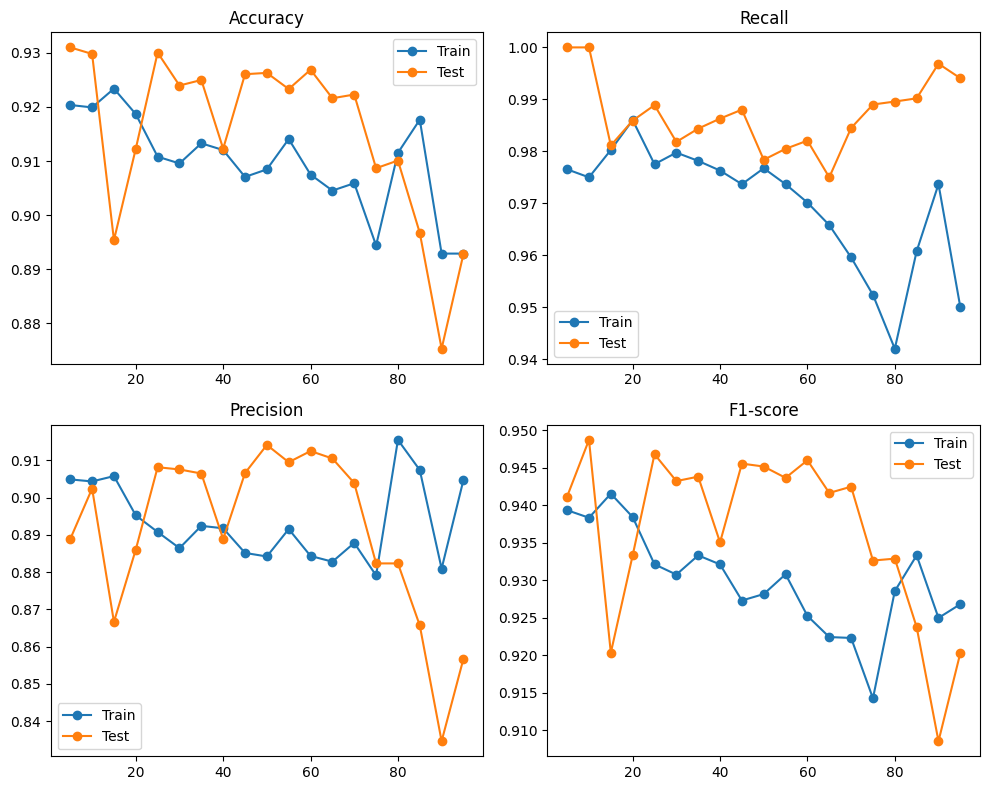

In [19]:
X = cancer.data
y = cancer.target
model = svm.SVC(random_state = 2023)
plot_ratio_perform(model, X, y, ratio=100)

#### **KNN**

In [20]:
from sklearn import neighbors

X = cancer.data
y = cancer.target
model = neighbors.KNeighborsClassifier()
ratio_perform(model, X, y, ratio=100)

>5, train:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       199
           1       0.94      0.97      0.96       341

    accuracy                           0.94       540
   macro avg       0.95      0.93      0.94       540
weighted avg       0.94      0.94      0.94       540

test:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.94      1.00      0.97        16

    accuracy                           0.97        29
   macro avg       0.97      0.96      0.96        29
weighted avg       0.97      0.97      0.97        29

>10, train:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       192
           1       0.94      0.97      0.96       320

    accuracy                           0.95       512
   macro avg       0.95      0.94      0.94       512
weighted avg       0.95      0.95      0.95  

Max accuracy: 0.966, at test_size 0.05
Max recall: 1.000, at test_size 0.9
Max precision: 0.957, at test_size 0.25
Max F1-score: 0.970, at test_size 0.05


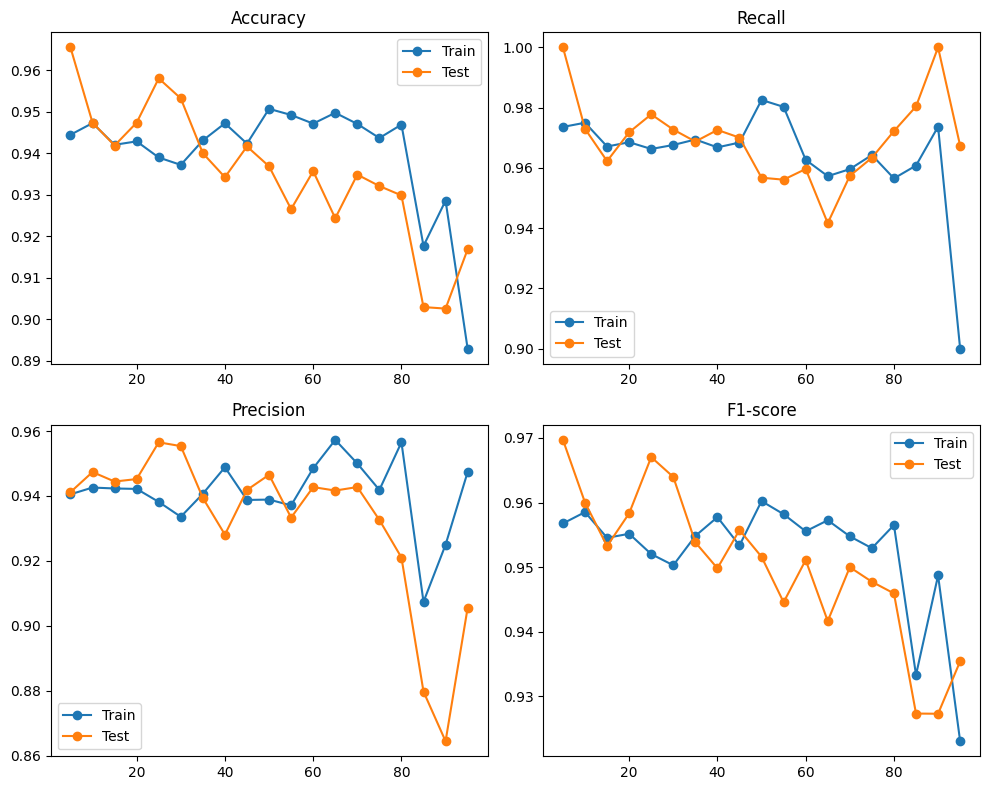

In [21]:
X = cancer.data
y = cancer.target
model = neighbors.KNeighborsClassifier()
plot_ratio_perform(model, X, y, ratio=100)

#### **Logistic Regression** 

In [22]:
from sklearn.linear_model import LogisticRegression

X = cancer.data
y = cancer.target
model = LogisticRegression(random_state=2023)
ratio_perform(model, X, y, ratio=100)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

>5, train:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       199
           1       0.95      0.96      0.96       341

    accuracy                           0.94       540
   macro avg       0.94      0.93      0.94       540
weighted avg       0.94      0.94      0.94       540

test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        16

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29

>10, train:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       192
           1       0.95      0.97      0.96       320

    accuracy                           0.95       512
   macro avg       0.95      0.94      0.94       512
weighted avg       0.95      0.95      0.95  

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

>30, train:
              precision    recall  f1-score   support

           0       0.94      0.89      0.92       151
           1       0.94      0.96      0.95       247

    accuracy                           0.94       398
   macro avg       0.94      0.93      0.93       398
weighted avg       0.94      0.94      0.94       398

test:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        61
           1       0.98      0.97      0.98       110

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

>35, train:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       140
           1       0.94      0.96      0.95       229

    accuracy                           0.94       369
   macro avg       0.94      0.93      0.94       369
weighted avg       0.94      0.94      0.94 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

>55, train:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       104
           1       0.95      0.96      0.95       152

    accuracy                           0.95       256
   macro avg       0.94      0.94      0.94       256
weighted avg       0.95      0.95      0.95       256

test:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       108
           1       0.95      0.97      0.96       205

    accuracy                           0.94       313
   macro avg       0.94      0.93      0.94       313
weighted avg       0.94      0.94      0.94       313

>60, train:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94        93
           1       0.96      0.96      0.96       134

    accuracy                           0.95       227
   macro avg       0.95      0.95      0.95       227
weighted avg       0.95      0.95      0.95 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Max accuracy: 1.000, at test_size 0.1
Max recall: 1.000, at test_size 0.1
Max precision: 1.000, at test_size 0.1
Max F1-score: 1.000, at test_size 0.1


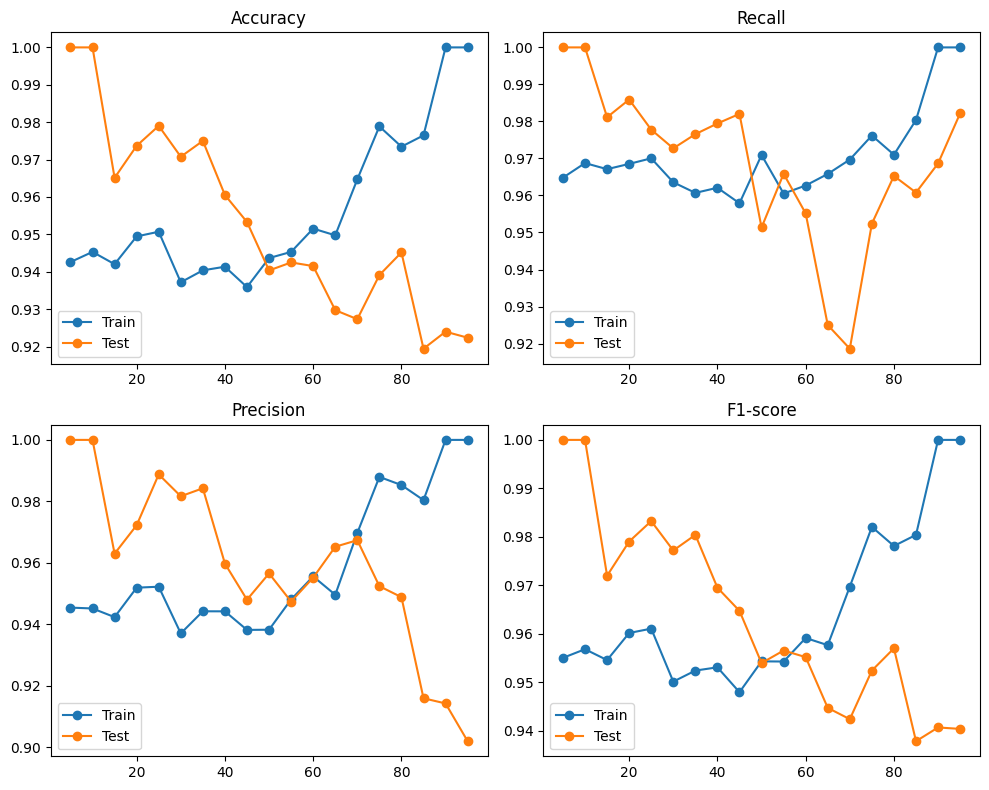

In [23]:
X = cancer.data
y = cancer.target
model = LogisticRegression(random_state=2023)
plot_ratio_perform(model, X, y, ratio=100)

### b. In your experiments, which ratio of these six classification models will perform best, respectively?

Use precision (because we want to check whether one has breast cancer and the result is that test size = 0.1 is the best ratio

## 4. According to the result of 3-b, please find the important features for these six classification models and draw the corresponding figure by descending order.

### a. What are the top 3 important features in each classification models?

In [24]:
def plot_feature_importances(model):
    n_features = cancer.data.shape[1]
    importances = model.feature_importances_
    indices = np.argsort(importances)
    plt.barh(np.arange(n_features), importances[indices], align='center')
    feature_names = np.array(cancer.feature_names)
    plt.yticks(np.arange(n_features), feature_names[indices])
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.show()

#### **Decision Tree**

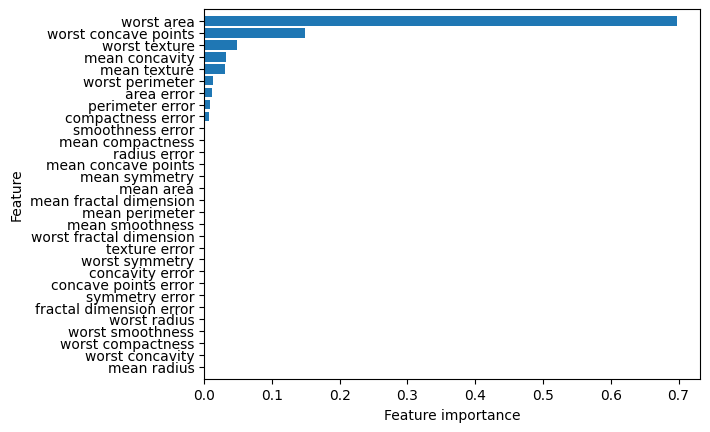

In [25]:
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=2023)
clf = tree.DecisionTreeClassifier(random_state = 2023)
clf.fit(X_train, y_train)

plot_feature_importances(clf)

#### **Random Forest**

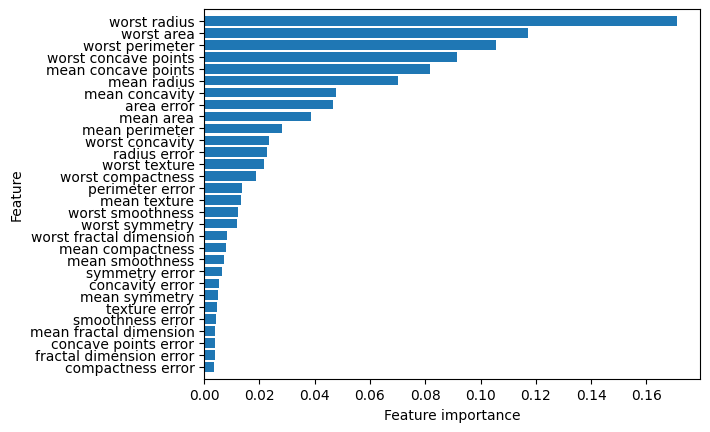

In [26]:
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=2023)
clf = RandomForestClassifier(random_state=2023)
clf.fit(X_train, y_train)

plot_feature_importances(clf)

#### **XGBoost**

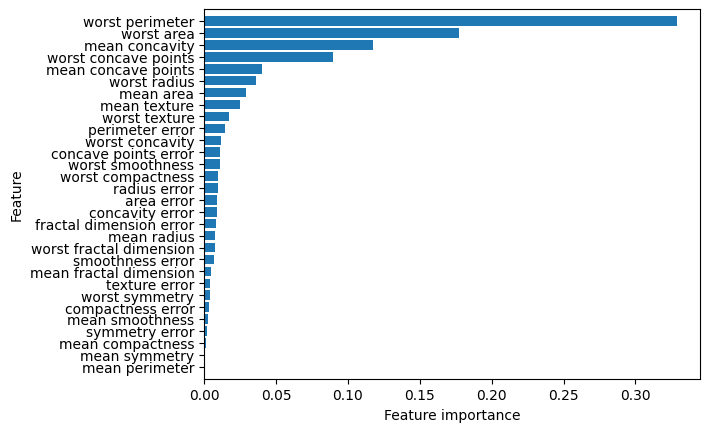

In [27]:
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=2023)
clf = XGBClassifier(random_state = 2023)
clf.fit(X_train, y_train)

plot_feature_importances(clf)

#### **SVC**

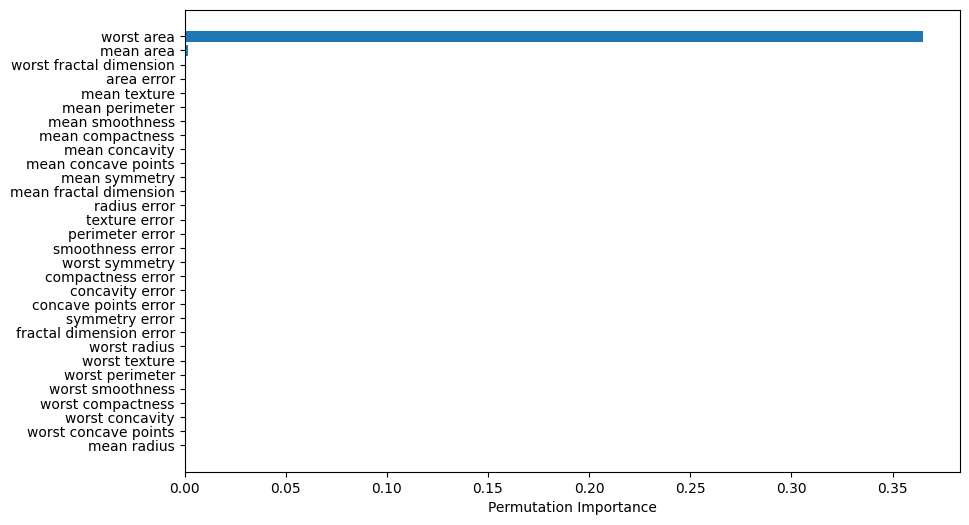

In [28]:
from sklearn.inspection import permutation_importance

X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=2023)
clf = svm.SVC(random_state=2023)
clf.fit(X_train,y_train)

result = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=2023, n_jobs=-1)

fig, ax = plt.subplots(figsize=(10, 6))
sorted_idx = result.importances_mean.argsort()
ax.barh(range(X.shape[1]), result.importances_mean[sorted_idx])
ax.set_yticks(range(X.shape[1]))
ax.set_yticklabels(cancer.feature_names[sorted_idx])
ax.set_xlabel('Permutation Importance')
plt.show()

#### **KNN**

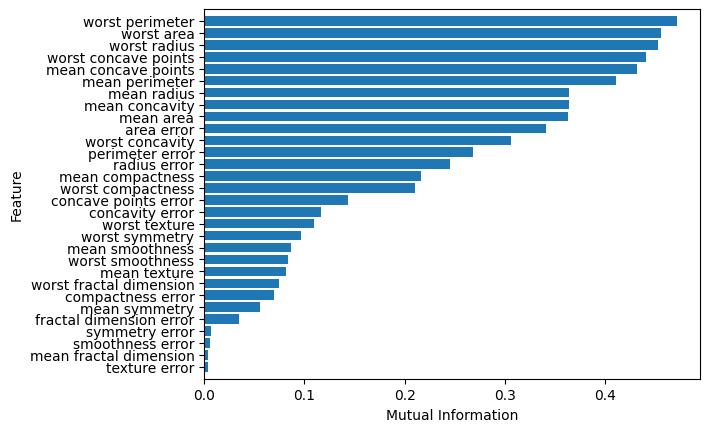

In [29]:
from sklearn.feature_selection import mutual_info_classif
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=2023)
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)

mutual_info = mutual_info_classif(X_train, y_train)

n_features = X.shape[1]
indices = np.argsort(mutual_info)
plt.barh(np.arange(n_features), mutual_info[indices], align='center')
feature_names = np.array(cancer.feature_names)
plt.yticks(np.arange(n_features), feature_names[indices])
plt.xlabel("Mutual Information")
plt.ylabel("Feature")
plt.ylim(-1, n_features)
plt.show()

#### **Logistic Regression**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


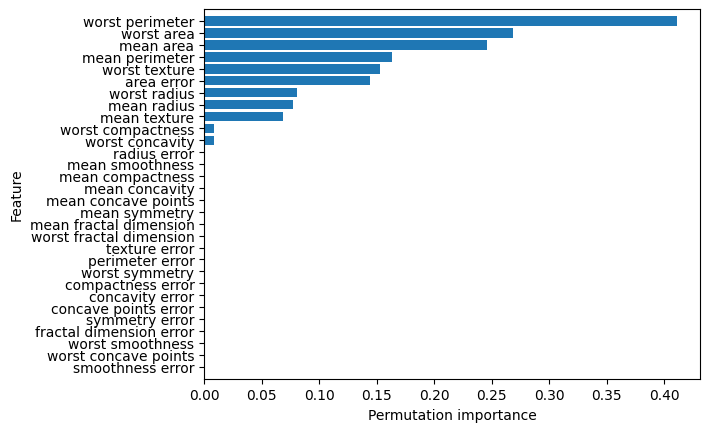

In [30]:
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2023)

clf = LogisticRegression()
clf.fit(X_train, y_train)

result = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=2023, n_jobs=-1)

importances = result.importances_mean
indices = np.argsort(importances)

plt.barh(range(n_features), importances[indices])
plt.yticks(range(n_features), cancer.feature_names[indices])
plt.xlabel("Permutation importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)
plt.show()


### b. Is there same important feature in these six classification models?